In [1]:
import numpy as np
import pylab as pl

from pacholcsyk import *
from freefree import *

To start with we can define a few parameters of the galaxy. 

- We'll model it as a solid disk with width 2kpc and a radius of 15kpc. 

- We'll assume a galactic magnetic field strength of 6 $\mu$G.

- We'll assume a thermal electron density of 0.01 cm$^{-3}$

- We'll assume a thermal electron temperature of $3\times 10^5$ K.


In [2]:
gal_radius_kpc = 15.
gal_height_kpc = 2.
H_G = 6e-6				# [G] = 6 uGauss  [CGS units]
ne_cm = 0.01			# cm^-3	[CGS units]
Te = 3e5				# [K]
N0 = 1e-8				# what should this be..? [m^-3 MeV^-1]

pc2cm = 3.086e18

We're going to use the equations from Pacholcsyk, which are all in CGS units:

In [3]:
const_c1 = 6.27e18		# page 85-86
const_c2 = 2.37e-3		# page 86 [for electrons & positrons]
const_c3 = 1.87e-23		# page 90
const_c4 = 4.20e7		# page 93

We'll calculate the spectrum over a range of frequencies from 1 kHz to 10 GHz:

In [4]:
nu = 10**np.arange(3,10,0.1)  # 1 kHz -> 10 GHz

The emissivity [in CGS units] is given by:

$$
\epsilon_{\nu} = \frac{1}{2}c_3 B \sin \theta \int_0^{\infty}{ N(E) F(x) {\rm d}E }
$$

In [5]:
em_nu = calc_em_synch(nu,H_G,N0)

integrals.py:15: RuntimeWarning: divide by zero encountered in log
  return quad(lambda x,*args: np.exp(x + np.log(func(np.exp(x),*args))), np.log(a), np.log(b), **kwargs)


In [6]:
nu_21cm = np.array([1.4e9])
em_21cm = calc_em_synch(nu_21cm,H_G,N0)

The free-free absorption co-efficient in units of pc$^{-1}$ is given by:

$$
\kappa_{\nu} = 1.64\times 10^5~T_{\rm e}\,n_{\rm e}^2\,\nu^{-2.1}
$$

where temperature is in Kelvin, electron density is in cm$^{-3}$ and frequency is in MHz.

In [7]:
kappa_nu = kappa_ff(nu,ne_cm,Te)  # pc^-1
kappa_nu/= pc2cm

The optical depth is calculated using

$$
\tau_{\nu} = \int_{l.o.s.}{\kappa_{\nu}\,{\rm d}\ell}
$$

In [8]:
dl = gal_radius_kpc*1000.*pc2cm
tau_nu = kappa_nu*dl # dimensionless

We then implement the equation of radiative transfer for an absorbing/emitting region:

$$
I_{\nu} = S_{\nu}\left( 1 - {\rm e}^{-\tau_{\nu}} \right)
$$

where,

$$
S_{\nu} = \frac{\epsilon_{\nu}}{\kappa_{\nu}}
$$

In [9]:
em_nu = (em_nu/kappa_nu)*(1 - np.exp(-1.*tau_nu))

Figure 1(a) from Protheroe & Biermann is normalised to $I_{\rm 1.4\,GHz}$, so let's quickly repeat that at a single frequency:

In [10]:
kappa_21cm = kappa_ff(nu_21cm,ne_cm,Te)  # pc^-1
kappa_21cm/= pc2cm
tau_21cm = kappa_21cm*dl # dimensionless
em_21cm=(em_21cm/kappa_21cm)*(1 - np.exp(-1.*tau_21cm))

Then do the normalisation and plot the result:

In [11]:
i_nu = em_nu/em_21cm

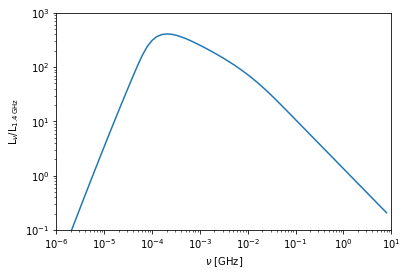

In [12]:
pl.subplot(111)
pl.plot(nu/1e9,i_nu)
pl.axis([10**-6,10,0.1,10**3])
pl.xlabel(r"$\nu$ [GHz]")
pl.ylabel(r"L$_{\nu}$/L$_{\rm 1.4\,GHz}$")
pl.loglog()
pl.show()